# -*- coding: utf-8 -*-
"""
Created on Tue Feb 26 16:00:07 2021

@author: Kuldeep Kumar
"""

In [2]:
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
#from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

READ THE CSV FILES

In [3]:
dataframe = pd.read_csv('happiness_score_dataset.csv')

In [4]:
print("Look up into data",dataframe.head(10))

Look up into data        Country                     Region  Happiness Rank  Happiness Score  \
0  Switzerland             Western Europe               1            7.587   
1      Iceland             Western Europe               2            7.561   
2      Denmark             Western Europe               3            7.527   
3       Norway             Western Europe               4            7.522   
4       Canada              North America               5            7.427   
5      Finland             Western Europe               6            7.406   
6  Netherlands             Western Europe               7            7.378   
7       Sweden             Western Europe               8            7.364   
8  New Zealand  Australia and New Zealand               9            7.286   
9    Australia  Australia and New Zealand              10            7.284   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0

create the bar chart of top 10 Countries

In [5]:
dataframe_top10 = dataframe.nlargest(10,['Happiness Score'])

In [6]:
print(dataframe_top10)

       Country                     Region  Happiness Rank  Happiness Score  \
0  Switzerland             Western Europe               1            7.587   
1      Iceland             Western Europe               2            7.561   
2      Denmark             Western Europe               3            7.527   
3       Norway             Western Europe               4            7.522   
4       Canada              North America               5            7.427   
5      Finland             Western Europe               6            7.406   
6  Netherlands             Western Europe               7            7.378   
7       Sweden             Western Europe               8            7.364   
8  New Zealand  Australia and New Zealand               9            7.286   
9    Australia  Australia and New Zealand              10            7.284   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884            

ean of Hapiness score to get the thresold

In [7]:
happyness_score_mean=dataframe['Happiness Score'].mean()
print(happyness_score_mean)

5.3757341772151905


In [8]:
dataframe=dataframe.drop(['Country','Region'],axis=1)

In [9]:
print("Corelation between data",dataframe.corr())

Corelation between data                                Happiness Rank  Happiness Score  \
Happiness Rank                       1.000000        -0.992105   
Happiness Score                     -0.992105         1.000000   
Standard Error                       0.158516        -0.177254   
Economy (GDP per Capita)            -0.785267         0.780966   
Family                              -0.733644         0.740605   
Health (Life Expectancy)            -0.735613         0.724200   
Freedom                             -0.556886         0.568211   
Trust (Government Corruption)       -0.372315         0.395199   
Generosity                          -0.160142         0.180319   
Dystopia Residual                   -0.521999         0.530474   

                               Standard Error  Economy (GDP per Capita)  \
Happiness Rank                       0.158516                 -0.785267   
Happiness Score                     -0.177254                  0.780966   
Standard Error          

In [10]:
y=dataframe[["Happiness Score"]]
X=dataframe.drop(["Happiness Score"],axis=1)

In [11]:
print("Lookup in to data",y.head(10))
#Null value for label
print("Null value in Label",y.isna().any())
print("Null value in X",X.isna().any())

Lookup in to data    Happiness Score
0            7.587
1            7.561
2            7.527
3            7.522
4            7.427
5            7.406
6            7.378
7            7.364
8            7.286
9            7.284
Null value in Label Happiness Score    False
dtype: bool
Null value in X Happiness Rank                   False
Standard Error                   False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual                False
dtype: bool


Scaling of the Data

In [12]:
scaler1=StandardScaler()
X=pd.DataFrame(scaler1.fit_transform(X),columns=X.columns)
print("Look up into data after scaling for X",X.head())

Look up into data after scaling for X    Happiness Rank  Standard Error  Economy (GDP per Capita)    Family  \
0       -1.721000       -0.805926                  1.369621  1.320281   
1       -1.699075        0.055889                  1.135226  1.514458   
2       -1.677149       -0.854487                  1.192861  1.361054   
3       -1.655224       -0.531526                  1.525130  1.251922   
4       -1.633299       -0.722845                  1.194876  1.221204   

   Health (Life Expectancy)   Freedom  Trust (Government Corruption)  \
0                  1.263408  1.577438                       2.309652   
1                  1.289434  1.332456                      -0.016480   
2                  0.992229  1.469659                       2.842774   
3                  1.035145  1.605131                       1.852081   
4                  1.118054  1.360416                       1.555725   

   Generosity  Dystopia Residual  
0    0.471040           0.758258  
1    1.575856       

In [13]:
scaler2=StandardScaler()
y=pd.DataFrame(scaler2.fit_transform(y),columns=y.columns)
print("Look up into data after scaling for y",y.head())

Look up into data after scaling for y    Happiness Score
0         1.937360
1         1.914581
2         1.884792
3         1.880411
4         1.797179


In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=22)
print("Shape of train data",X_train.shape)
print("Shape of test data ",X_test.shape)

Shape of train data (110, 9)
Shape of test data  (48, 9)


Test options and evaluation metric

In [15]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

Spot-Check Algorithms

In [17]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
#models.append(('XGB', XGBRegressor()))

evaluate each model in turn

In [18]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
#Out put is getting best for LinearRegression
# LR: -0.000000 (0.000000)
# LASSO: -1.017395 (0.450396)
# EN: -0.477101 (0.256295)
# KNN: -0.081843 (0.047432)
# CART: -0.010387 (0.011038)
# SVR: -0.064700 (0.093131)
# XGB: -0.005038 (0.004796)

LR: -0.000000 (0.000000)
LASSO: -1.017395 (0.450396)
EN: -0.477101 (0.256295)
KNN: -0.081843 (0.047432)
CART: -0.012242 (0.012983)
SVR: -0.064700 (0.093131)


Compare Algorithms

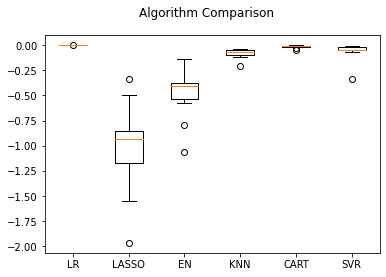

In [19]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
predictions = model.predict(X_test)
print(mean_squared_error(y_test, predictions))

5.544688737356209e-08


In [22]:
final_prediction_res=pd.DataFrame(predictions,columns=['Happyness_Score'])
final_prediction_res.to_excel("Final_Score.xlsx",index=False)